## Data Analysis Masters Capstone - Course-end Project 3

### Cardiovascular Disease prediction - Data analysis, EDA, and logistic regression modeling

#### Problem statement
Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

#### Preliminary analysis
1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates etc.
2. Based on the findings from the previous question remove duplicates (if any) , treat missing values using appropriate strategy.
 
#### Informative report
* Prepare an informative report about the data explaining distribution of the disease and the related factors. You could use the below approach to achieve the objective
    1. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.
    2. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot
    3. Study the occurrence of CVD across Age.
    4. Study the composition of overall patients w.r.t . Gender.
    5. Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?
    6. Describe the relationship between Cholesterol levels and our target variable.
    7. What can be concluded about the relationship between peak exercising and occurrence of heart attack.
    8. Is thalassemia a major cause of CVD?
    9. How are the other factors determining the occurrence of CVD?
    10. Use a pair plot to understand the relationship between all the given variables.


* Build a baseline model to predict using a Logistic Regression and explore the results.



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
#Read the file to using pandas(pd)

data =pd.read_excel(r"C:\Users\padma\Data analytics\Fortray\Capstone Projects\CapstoneProject3\3\data.xlsx")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Display the Missing Values

print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#No null values identified, clean data...

In [9]:
#Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

<Axes: xlabel='sex', ylabel='count'>

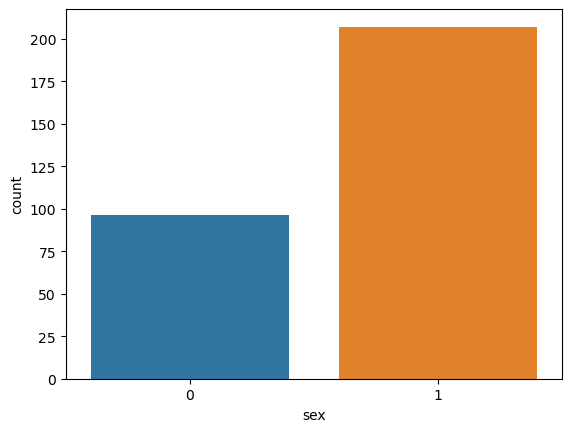

In [10]:
sns.countplot(data, x="sex")

<Axes: xlabel='cp', ylabel='count'>

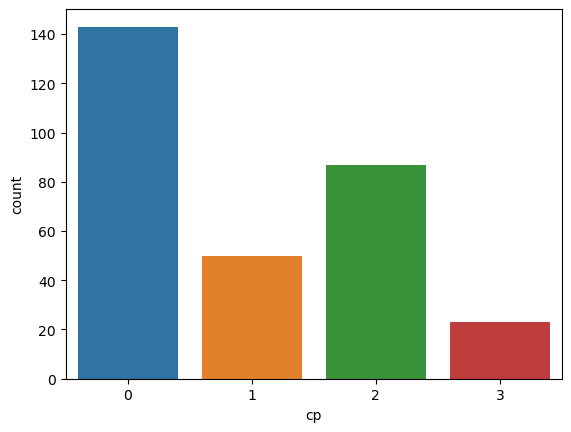

In [11]:
sns.countplot(data, x="cp")

<Axes: xlabel='fbs', ylabel='count'>

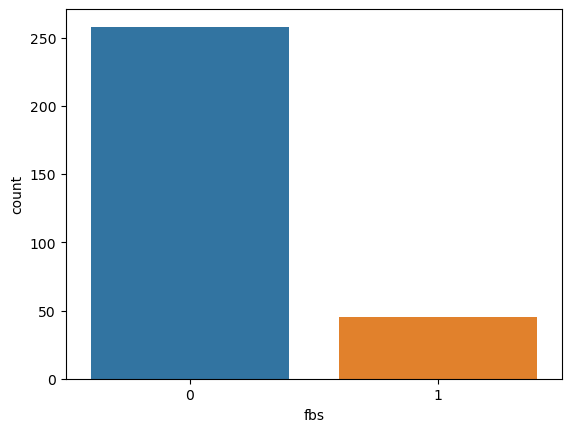

In [12]:
sns.countplot(data, x = "fbs")

<Axes: xlabel='restecg', ylabel='count'>

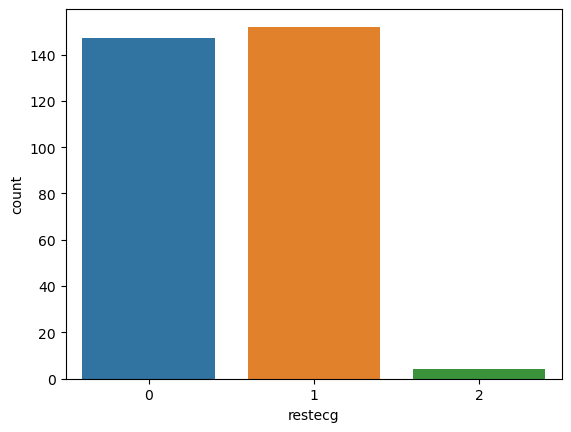

In [13]:
sns.countplot(data, x = "restecg")

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='exang', ylabel='count'>

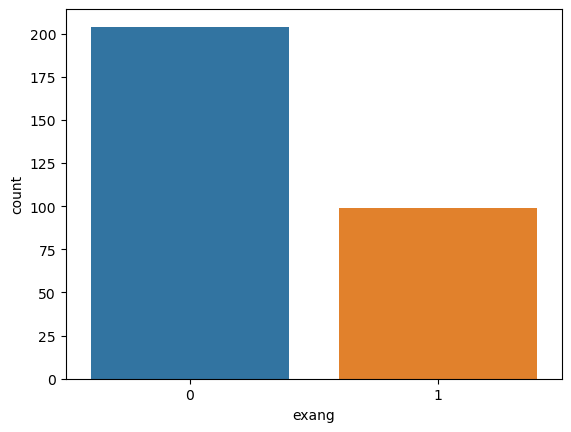

In [15]:
sns.countplot(data, x = "exang")

<Axes: xlabel='slope', ylabel='count'>

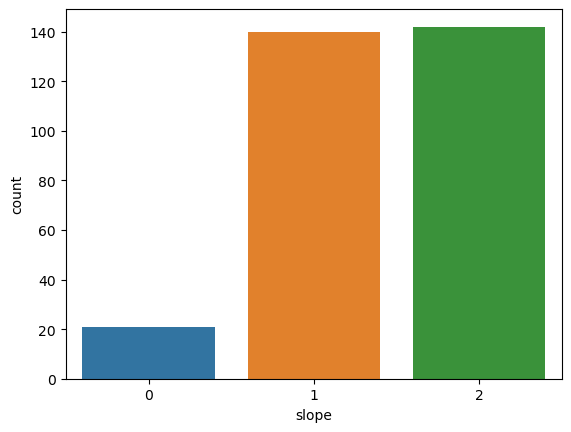

In [16]:
sns.countplot(data, x = "slope")

<Axes: xlabel='ca', ylabel='count'>

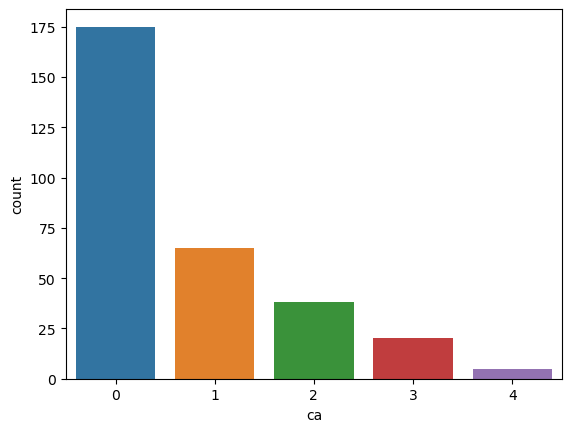

In [17]:
sns.countplot(data, x = "ca")

<Axes: xlabel='thal', ylabel='count'>

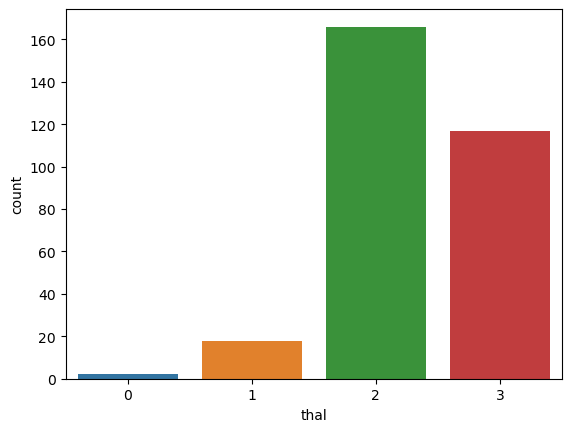

In [18]:
sns.countplot(data, x = "thal")

<Axes: xlabel='target', ylabel='count'>

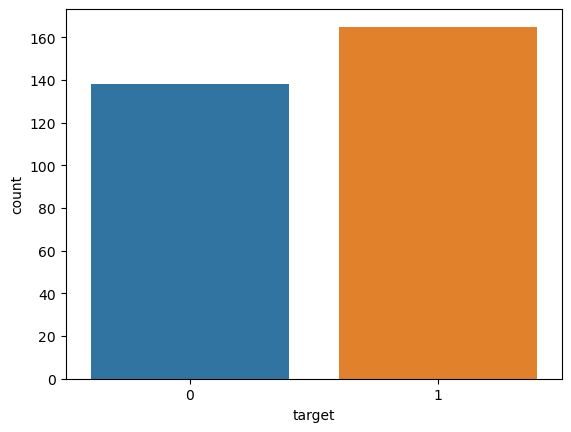

In [19]:
sns.countplot(data, x = "target")

Lets see if theirs a good proportion between our positive & negative binary predictor.

In [20]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

**Correlation Matrix**- let’s you see correlations between all variables.

Within seconds, you can see whether something is positively or negatively correlated with our predictor (target).

<Axes: >

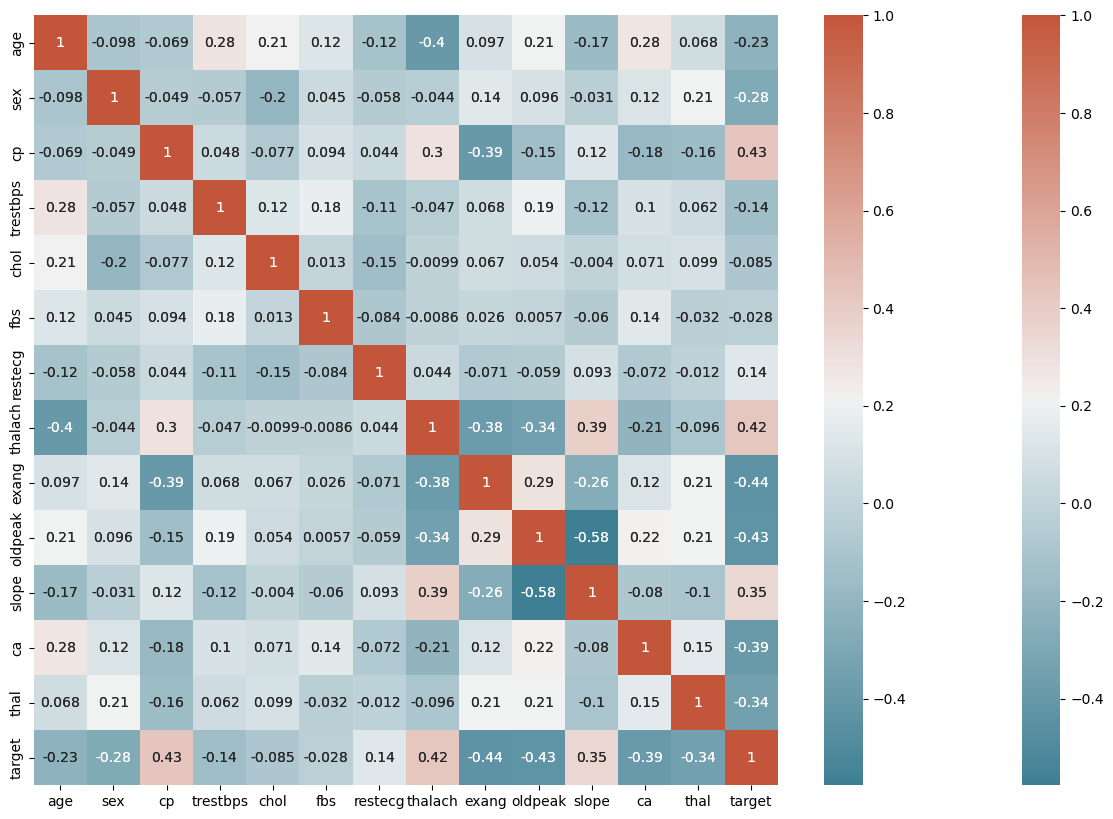

In [21]:
# calculate correlation matrix

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

*We can see there is a positive correlation between chest pain (cp) & target (our predictor). This makes sense since, the greater amount of chest pain results in a greater chance of having heart disease. Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.*

*In addition, we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.*

C:\Users\padma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


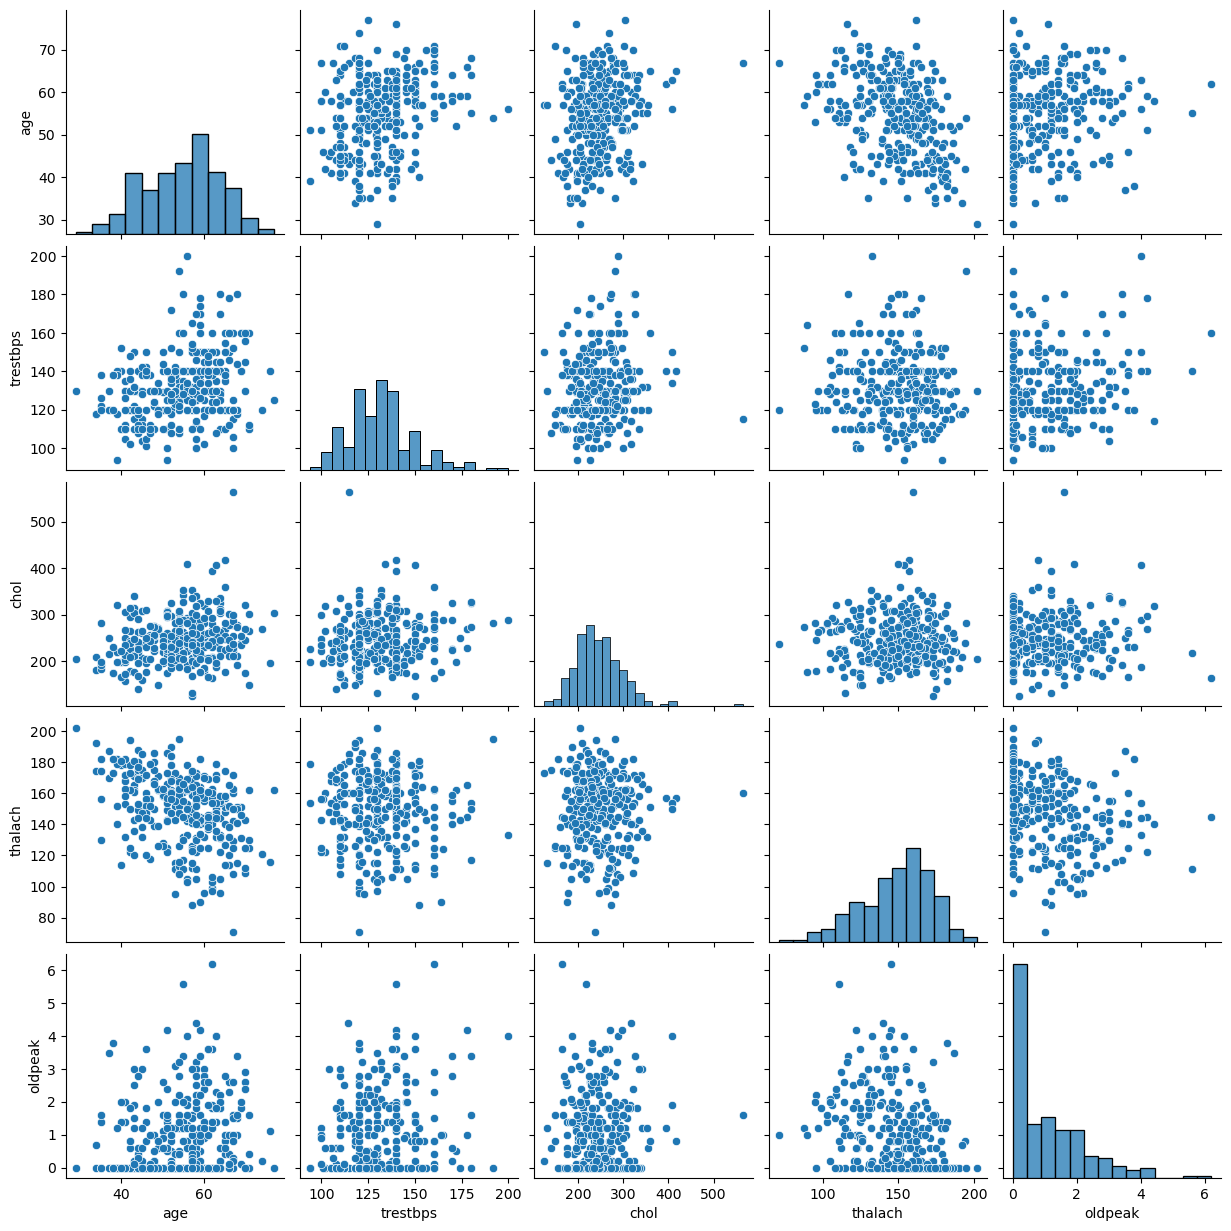

In [22]:
# Using pairplots to see the continuous columns variable correlation

subData = data[['age','trestbps','chol','thalach','oldpeak']]
sns.pairplot(subData)

Making a smaller pairplot with only the continuous variables, to dive deeper into the relationships. Also a great way to see if theirs a positive or negative correlation!

C:\Users\padma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(36.818927083333335, 0.5, 'ST depression')

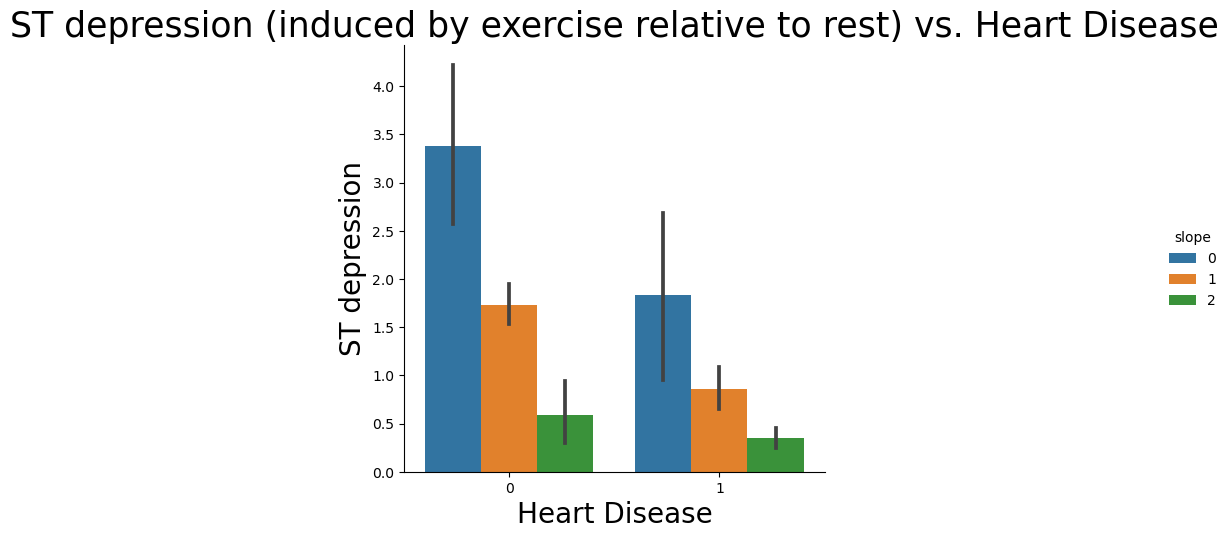

In [23]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

*ST segment depression occurs because when the ventricle is at rest and therefore repolarized. If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease. This supports the plot above because low ST Depression yields people at* *greater risk for heart disease*. While a high ST depression is considered normal & healthy. The “slope” hue, refers to the peak exercise ST segment, with values: 0: upsloping , 1: flat , 2: downsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.*

**Outlier detection Using box plot and violin plot**

Text(0, 0.5, 'Thalach Level')

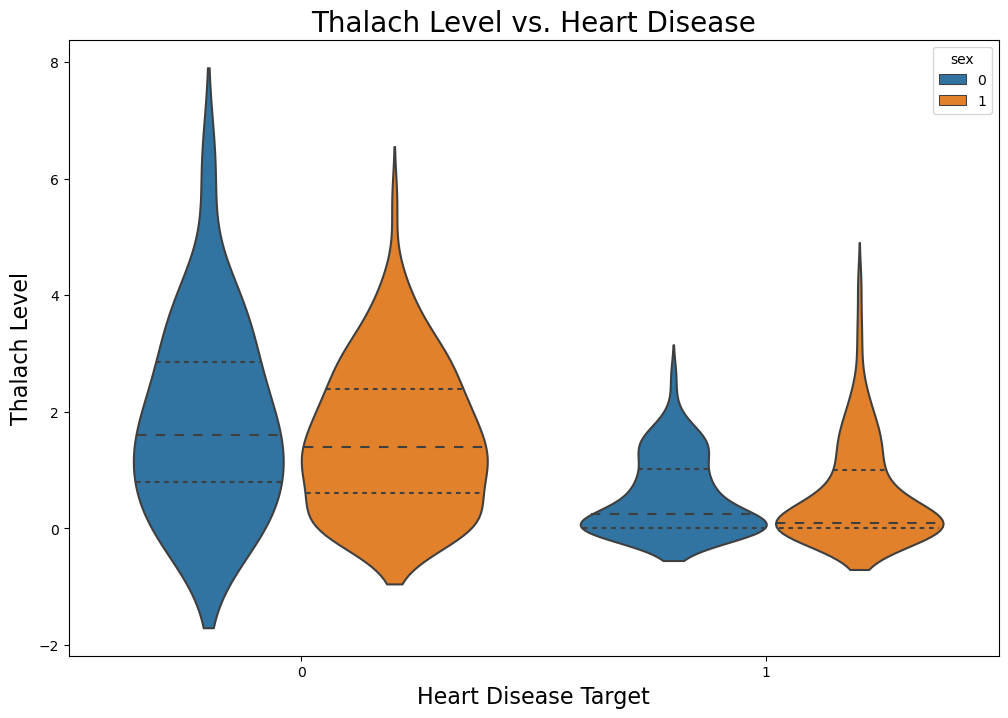

In [24]:
# Violin plot


plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

*We can see that the overall shape & distribution for negative & positive patients differ vastly. Positive patients exhibit a lower median for ST depression level & thus a great distribution of their data is between 0 & 2, while negative patients are between 1 & 3. In addition, we don’t see many differences between male & female target outcomes.*

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

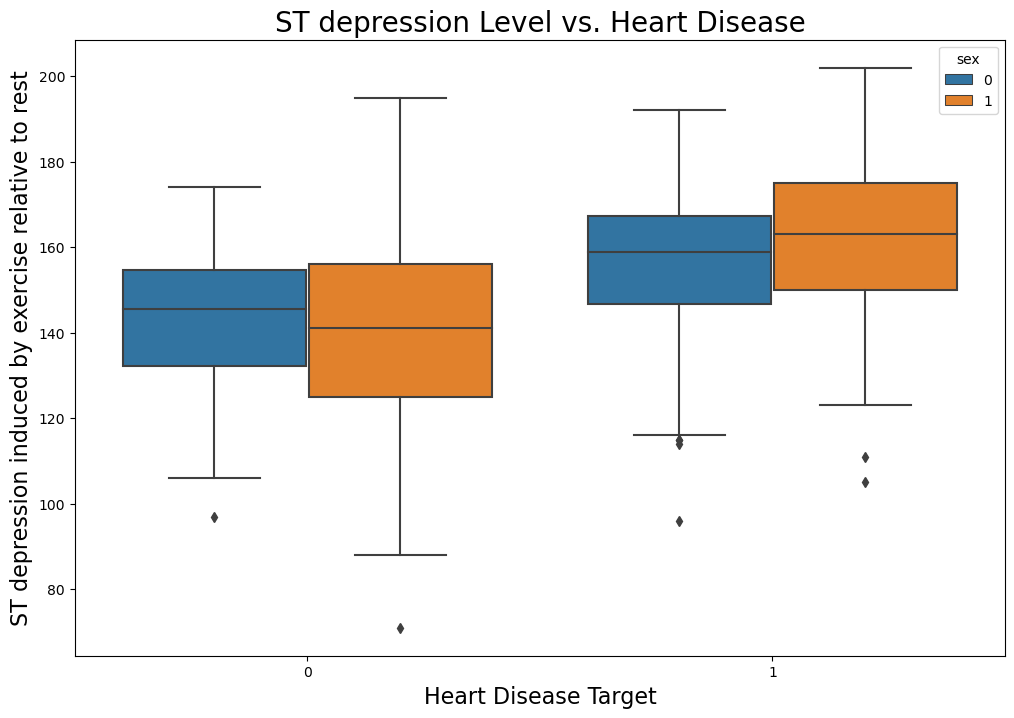

In [25]:
# Box Plot

plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

*Positive patients exhibit a heightened median for ST depression level, while negative patients have lower levels. In addition, we don’t see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression.*

**Filtering data by positive & negative Heart Disease patient**

In [26]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [27]:
# Filtering data by NEGATIVE Heart Disease patient
pos_data = data[data['target']==0]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [28]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [29]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 1.5855072463768116
(Negative Patients ST depression): 1.5855072463768116


In [30]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 139.1014492753623
(Negative Patients thalach): 139.1014492753623


*From comparing positive and negative patients we can see there are vast differences in means for many of our 13 Features. From examining the details, we can observe that positive patients experience heightened maximum heart rate achieved (thalach) average. In addition, positive patients exhibit about 1/3rd the amount of ST depression induced by exercise relative to rest (oldpeak).*

# **Machine Learning + Predictive Analytics**

Prepare Data for Modeling

To prepare data for modeling, just remember ASN (Assign,Split, Normalize).

Assign the 13 features to X, & the last column to our classification predictor, y

In [31]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:
# Split: the data set into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [33]:
#Normalize: Standardizing the data will transform the data so that its distribution will have a 
#mean of 0 and a standard deviation of 1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
# Prediction using the Classification model Logistic Regression

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



*Achieved 74% accuracy*

In [35]:
# Prediction using Random Forest Classifier

from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



*Achieved 80% accuracy*

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

*Thus, from confusion matrix we conclude a good outcome as 80% is the ideal accuracy!*